In [1]:
SINGLE_PEERSET_BENCHMARK = "./single_peerset_local_1.csv"
CROSS_PEERSET_BENCHMARK = "./cross_peerset_local_1.csv"


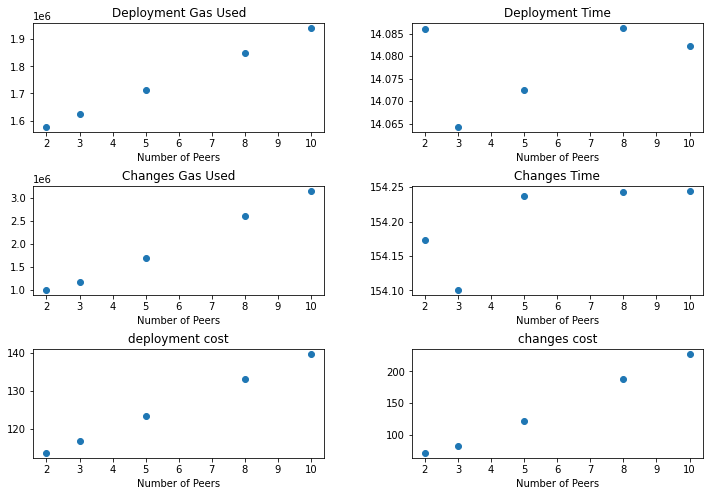

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv(SINGLE_PEERSET_BENCHMARK)
df.columns = [col.strip() for col in df.columns]

# Convert the time columns to floats (in seconds)
df["deployment_time"] = df["deployment_time"].apply(lambda x: float(x[:-1]))
df["changes_time"] = df["changes_time"].apply(lambda x: float(x[:-1]))

# Add columns for deployment and changes cost in USD
gas_price = 40 # gwei
eth_price = 1800 # USD
df['deployment_cost'] = df['deployment_gas_used'] * gas_price * 10**-9 * eth_price
df['changes_cost'] = df['changes_gas_used'] * gas_price * 10**-9 * eth_price


# Plot the variables against the number of peers
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0, 0].scatter(df["peers_num"], df["deployment_gas_used"])
axs[0, 0].set_title("Deployment Gas Used")
axs[0, 1].scatter(df["peers_num"], df["deployment_time"])
axs[0, 1].set_title("Deployment Time")
axs[1, 0].scatter(df["peers_num"], df["changes_gas_used"])
axs[1, 0].set_title("Changes Gas Used")
axs[1, 1].scatter(df["peers_num"], df["changes_time"])
axs[1, 1].set_title("Changes Time")

axs[2, 0].scatter(df["peers_num"], df["deployment_cost"])
axs[2, 0].set_title("deployment cost")

axs[2, 1].scatter(df["peers_num"], df["changes_cost"])
axs[2, 1].set_title("changes cost")
for ax in axs.flat:
    ax.set(xlabel="Number of Peers")

fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [ ]:
# 1. Smart contract deployment - this happens for every peerset - 100$

# 2. Peer proposes a change
#  -> single blockchain transaction (10$)

# 3. each peer votes for a change (num_peers x


# compare smart contract execution to empty smart contract
# (a simple counter?)

# distinguish between costs of various operations:
# - single vote
# - vote determining status of voting round


# look at historical stats to estimate how much time it takes to include a transaction
# skip ifps in time estimation, focus on ethereum.

# state of the art: compare cost of our smart contract to other smart contracts.

# Friday 14:00


# does changing variable names affect the cost?


In [ ]:
# Before optimisations:

# ❯ forge test --match-contract "PeerSetBenchmarkTest" --match-test "testBenchmarkSuccessfulGraphChange" --gas-report
# [⠰] Compiling...
# [⠒] Compiling 4 files with 0.8.17
# [⠢] Solc 0.8.17 finished in 1.69s
# Compiler run successful
# 2023-05-07T08:21:19.321158Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: starting tests
# 2023-05-07T08:21:19.322311Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: done. 1/1 successful duration=1.13348ms
#
# Running 1 test for test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest
# [PASS] testBenchmarkSuccessfulGraphChange() (gas: 199183)
# Test result: ok. 1 passed; 0 failed; finished in 1.13ms
# | src/peer-set/PeerSetSmartContract.sol:PeerSetSmartContract contract |                 |        |        |        |         |
# |---------------------------------------------------------------------|-----------------|--------|--------|--------|---------|
# | Deployment Cost                                                     | Deployment Size |        |        |        |         |
# | 1521598                                                             | 7653            |        |        |        |         |
# | Function Name                                                       | min             | avg    | median | max    | # calls |
# | currentPeerSetPermissionGraphIPFSPointer                            | 1244            | 1244   | 1244   | 1244   | 1       |
# | proposePermissionGraphChange                                        | 140658          | 140658 | 140658 | 140658 | 1       |
# | submitPeerVote                                                      | 27676           | 34506  | 34506  | 41336  | 2       |



In [ ]:
# After optimisations:


